In [3]:
import os
import numpy as np
import pandas as pd

In [4]:
file_list = os.listdir('raw')
all_gestures = []
for f_name in file_list:
    with open(os.path.join('raw', f_name), 'r') as f:
        lines = f.readlines()
    num_line = 0
    all_sample_for_a_gesture  = []
    while(num_line < len(lines)):
        l = lines[num_line]
        if '//' in l:
            sample = [s_data.strip().replace("{", '').replace("}", '').split(',')[:100] for s_data in lines[num_line+1:num_line+9]]
            all_sample_for_a_gesture.append(sample)
            num_line += 10
        else:
            num_line += 1
    all_gestures.append(all_sample_for_a_gesture)
    all_gestures_arr = np.array(all_gestures,dtype=float)


In [5]:
# check mean and variance of each sensors data
mul_variable_mean_std = []
for s_idx in range(8):
    s_data = all_gestures_arr[:,:,s_idx,:]
    mul_variable_mean_std.append((np.mean(s_data), np.std(s_data)))
mul_variable_mean_std


[(167.377125, 159.12012962455245),
 (168.517625, 134.19277491489387),
 (275.8375, 214.46926631512966),
 (301.89485, 219.12755633073058),
 (170.950925, 134.63295572275155),
 (95.0701, 61.74473488476568),
 (167.4275, 121.41438750720607),
 (210.18815, 176.00731831255624)]

In [6]:
# for each gesture, normalizing each variables and write gesture_id.npy
# each gesture data has 50 samples, each sample has 8 variables, length = 100, thus shape of npy is (50, 8, 100)
for g_id in range(8):
    gestures_arr_normalized = np.zeros(all_gestures_arr.shape[1:])
    for s_id in range(8):
        s_mean, s_std = mul_variable_mean_std[s_id]
        gestures_arr_normalized[:, s_id, :] = (all_gestures_arr[g_id, :, s_id, :] - s_mean)/s_std
    np.save(os.path.join('processed', f'g_id_{g_id}.npy'), gestures_arr_normalized)

In [7]:
# read the npy file and visualize
gesture_samples_npy = [np.load(os.path.join('processed',g)) for g in os.listdir('processed')]

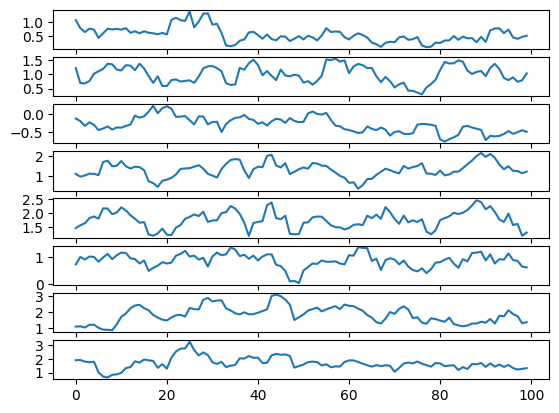

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
def draw_a_sample(sample):
    # sample in shape of (8, 100)
    fig, axes = plt.subplots(nrows=8,ncols=1)
    for s in range(8):
        pd.Series(sample[s,:]).plot(ax=axes[s], label=f'sensor_{s}')

g_sample = gesture_samples_npy[1][1, :, :]
draw_a_sample(g_sample)

In [45]:
g_sample.shape

(8, 100)